# Análisis de líneas espectrales estrellas masivas
***
Estimación de parámetros estelares: velocidad de rotación, log g, temperatura efectiva

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout, Input
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import load_model
from tensorflow_addons.metrics import RSquare
import numpy as np
import time

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/00_XAI_Curso/datos_XAI/df_ZPEKTR_limb_lineal.csv")

In [ ]:
df

,4460.1,4460.2,4460.3,4460.4,4460.5,4460.6,4460.7,4460.8,4460.9,4461.0,...,vsini,M/M⊙,R/R⊙,V/Vc,L*,Ω/Ωc,Tpole,Teq,gpole,geq
0,0.996583,0.996529,0.996452,0.996362,0.996264,0.996160,0.996052,0.995942,0.995830,0.995717,...,228.0,15.0,5.79,0.75,4.105,0.912,28000.0,23690.0,4.20,4.02
1,0.996234,0.996208,0.996180,0.996141,0.996108,0.996074,0.996027,0.995962,0.995851,0.995678,...,309.0,17.0,5.75,0.77,4.230,0.928,30000.0,25014.0,4.25,4.06
2,0.997128,0.996958,0.996770,0.996573,0.996368,0.996163,0.995957,0.995746,0.995530,0.995321,...,254.0,10.0,8.42,0.65,3.857,0.836,19000.0,16859.0,3.63,3.50
3,0.993683,0.993541,0.993413,0.993277,0.993126,0.992986,0.992836,0.992683,0.992531,0.992366,...,351.0,12.0,5.31,0.68,3.351,0.860,18000.0,15772.0,4.12,3.98
4,0.995026,0.994887,0.994749,0.994607,0.994464,0.994324,0.994183,0.994040,0.993885,0.993727,...,310.0,12.0,6.35,0.65,3.778,0.842,21000.0,18578.0,3.96,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,0.997252,0.997177,0.997096,0.997015,0.996925,0.996834,0.996746,0.996653,0.996512,0.996266,...,181.0,10.0,8.84,0.71,3.835,0.884,19000.0,16409.0,3.63,3.47
10687,0.996881,0.996865,0.996835,0.996777,0.996702,0.996621,0.996535,0.996448,0.996362,0.996273,...,220.0,15.0,5.62,0.66,4.178,0.845,29000.0,25609.0,4.20,4.06
10688,0.995203,0.995078,0.994956,0.994825,0.994694,0.994560,0.994422,0.994278,0.994129,0.993986,...,329.0,14.0,7.39,0.66,3.914,0.848,21000.0,18515.0,3.89,3.76
10689,0.993157,0.992989,0.992820,0.992641,0.992453,0.992275,0.992084,0.991878,0.991684,0.991485,...,346.0,16.0,5.31,0.63,3.618,0.816,21000.0,18802.0,4.24,4.12


In [ ]:
X = df.iloc[:,0:170] # X matrix containing spectral lines (flux)
y_input = df.iloc[:,170:176] # input parameters
y_output = df.iloc[:,176:] # output parameters
y = df.iloc[:,176:177] # y matrix containing the values we want to predict

## Gráfica de una línea espectral

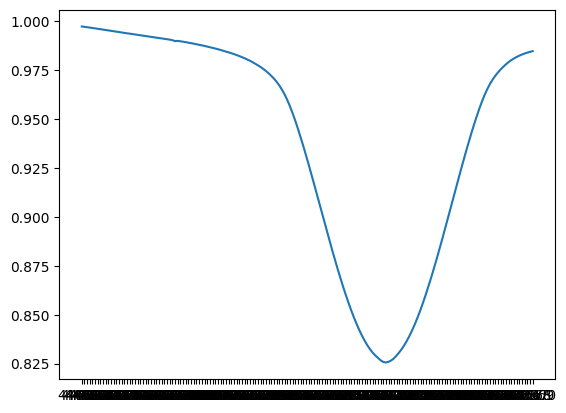

In [ ]:
plt.figure()
plt.plot(X.iloc[2,:])
plt.show()

In [ ]:
y

,<Teff>
0,25502.0
1,27478.0
2,18315.0
3,17238.0
4,20154.0
...,...
10686,17656.0
10687,26995.0
10688,20213.0
10689,20104.0


In [ ]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

y_scaler = MinMaxScaler()

y = y_scaler.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

In [ ]:
! pip install tensorflow_probability

In [ ]:
import tensorflow_probability as tfp
import tensorflow as tf

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def NLL(y, distr):
  return -distr.log_prob(y)


In [ ]:
%matplotlib inline
plt.style.use('default')

tfd = tfp.distributions
tfb = tfp.bijectors
print("TFP Version", tfp.__version__)
print("TF  Version",tf.__version__)

TFP Version 0.22.0
TF  Version 2.14.0


In [ ]:
def normal_exp(params):
  return tfd.Normal(loc=params[:,0:1], scale=tf.math.exp(params[:,1:2]))# both parameters are learnable

In [ ]:
from tensorflow.keras.layers import Dropout

inputs = Input(shape=(170,))
hidden = Dense(200,activation="relu")(inputs)
hidden = Dropout(0.1)(hidden, training=True)
hidden = Dense(500,activation="relu")(hidden)
hidden = Dropout(0.1)(hidden, training=True)
hidden = Dense(500,activation="relu")(hidden)
hidden = Dropout(0.1)(hidden, training=True)
hidden = Dense(500,activation="relu")(hidden)
hidden = Dropout(0.1)(hidden, training=True)
hidden = Dense(200,activation="relu")(hidden)
hidden = Dropout(0.1)(hidden, training=True)
params_mc = Dense(2)(hidden)
dist_mc = tfp.layers.DistributionLambda(normal_exp, name='normal_exp')(params_mc)

model_mc = Model(inputs=inputs, outputs=dist_mc)
model_mc.compile(Adam(learning_rate=0.0002), loss=NLL)

In [ ]:
model_mc.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 170)]             0         
                                                                 
 dense_6 (Dense)             (None, 200)               34200     
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               100500    
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0   

In [ ]:
from time import time
start = time()
# Note that the model has been trained with 2048 data points
history = model_mc.fit(X_train, y_train, epochs=50, verbose=1,batch_size=64)
print('time taken : ',np.round(time() - start,3)) #468 sec
# model_vi.save_weights('model_mc.hdf5')


Epoch 1/50
107/107 [==============================] - 5s 25ms/step - loss: -0.3725
Epoch 2/50
107/107 [==============================] - 3s 26ms/step - loss: -0.9601
Epoch 3/50
107/107 [==============================] - 2s 17ms/step - loss: -1.1747
Epoch 4/50
107/107 [==============================] - 2s 17ms/step - loss: -1.3040
Epoch 5/50
107/107 [==============================] - 2s 17ms/step - loss: -1.3688
Epoch 6/50
107/107 [==============================] - 2s 17ms/step - loss: -1.4863
Epoch 7/50
107/107 [==============================] - 2s 17ms/step - loss: -1.4659
Epoch 8/50
107/107 [==============================] - 4s 35ms/step - loss: -1.5774
Epoch 9/50
107/107 [==============================] - 3s 25ms/step - loss: -1.6317
Epoch 10/50
107/107 [==============================] - 2s 17ms/step - loss: -1.6720
Epoch 11/50
107/107 [==============================] - 2s 17ms/step - loss: -1.7293
Epoch 12/50
107/107 [==============================] - 2s 17ms/step - loss: -1.7493
E

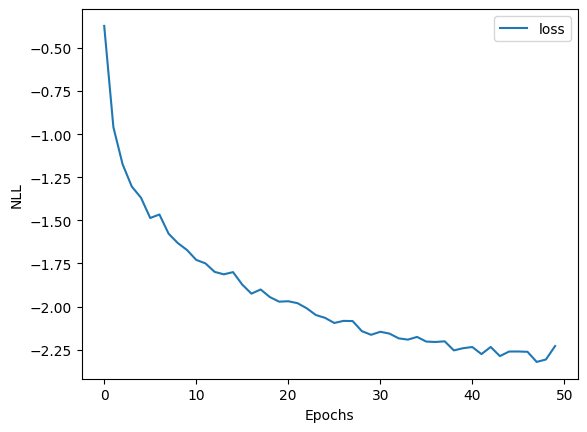

In [ ]:
plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.ylabel('NLL')
plt.xlabel('Epochs')
#plt.ylim([0,20])
plt.show()

In [ ]:
from tqdm import tqdm_notebook as tqdm
T = 100
mc_cpd =np.zeros((T,len(X_test)))
for i in tqdm(range(0,T)):
    mc_cpd[i,:]=np.reshape(model_mc.predict(X_test),len(X_test))

<ipython-input-26-2f0f89cdf578>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0,T)):


  0%|          | 0/100 [00:00<?, ?it/s]

67/67 [==============================] - 1s 8ms/step


In [ ]:
mc_cpd.shape

(100, 2139)

In [ ]:
mc_cpd_mean = np.mean(mc_cpd,axis=0)

In [ ]:
mc_cpd_mean.shape, y_test.shape

((2139,), (2139, 1))

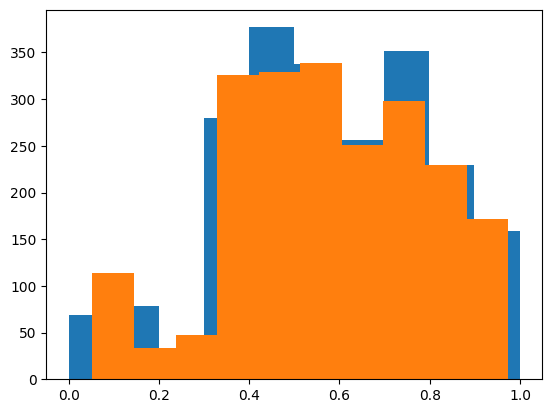

In [ ]:
plt.figure()
plt.hist(y_test)
plt.hist(mc_cpd_mean)
plt.show()

Se deben mostrar los datos "desnormalizados"

## ¿Cómo predecir dos parámetros espectrales?

In [ ]:
# check: https://stackoverflow.com/questions/71300786/tensorflow-probability-want-nn-to-output-multiple-distributions